#### Task 3.3 Measure the execution time for each approach varying the matrix size. Report the average and error (std. deviation, min/max, or interval of confidence). 

In [61]:
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import dgemm

dot_times = []
matmul_times = []
sizes = [i for i in range(2, 31)]
stds = {s:{
    'pyls':0, 'pyarr':0, 'nparr':0 
} for s in sizes}
timings = {s:{
    'pyls':0, 'pyarr':0, 'nparr':0 
} for s in sizes}

num_runs = 50

for size in sizes:
    pyls_std_ls = []
    pyarr_std_ls = []
    nparr_std_ls = []
    pyls_time_count = 0
    pyarr_time_count = 0
    nparr_time_count = 0
    matmul_time_count = 0

    for _ in range(num_runs):
        start_time = timer()
        dgemm.run_pylist(size)
        end_time = timer()
        pyls_std_ls.append(end_time - start_time)
        pyls_time_count += end_time - start_time
        
        start_time = timer()
        dgemm.run_pyarray(size)
        end_time = timer()
        pyarr_std_ls.append(end_time - start_time)
        pyarr_time_count += end_time - start_time
        
        start_time = timer()
        dgemm.run_numpyarray(size)
        end_time = timer()
        nparr_std_ls.append(end_time - start_time)
        nparr_time_count += end_time - start_time

        start_time = timer()
        dgemm.matmul(size)
        end_time = timer()
        matmul_time_count += end_time - start_time

    stds[size]['pyls'] = np.std(pyls_std_ls)
    stds[size]['pyarr'] = np.std(pyarr_std_ls)
    stds[size]['nparr'] = np.std(nparr_std_ls)
    timings[size]['pyls'] = pyls_time_count/num_runs
    timings[size]['pyarr'] = pyarr_time_count/num_runs
    timings[size]['nparr'] = nparr_time_count/num_runs
    matmul_times.append(matmul_time_count/num_runs)

In [30]:
ylim_std = max(
    [stds[sizes[-1]]['pyls'], stds[sizes[-1]]['pyarr'], stds[sizes[-1]]['nparr']]
) * 1.1
ylim_time = max(
    [timings[sizes[-1]]['pyls'], timings[sizes[-1]]['pyarr'], timings[sizes[-1]]['nparr']]
) * 1.1

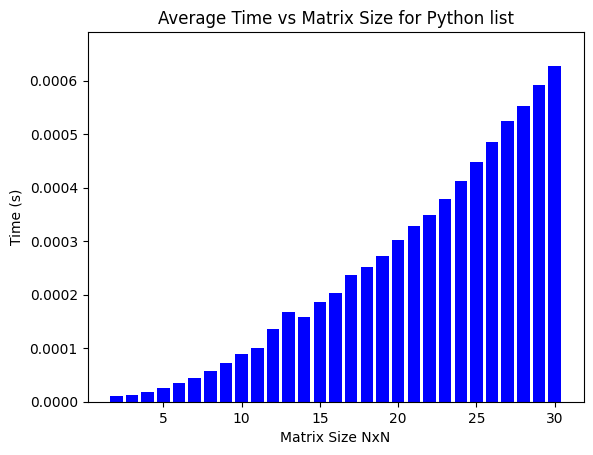

In [31]:
def plot_graph(sizes, times, title, ylim):
    plt.bar(sizes, times, color='blue')

    plt.xlabel('Matrix Size NxN')
    plt.ylabel('Time (s)')
    plt.ylim(0,ylim)
    plt.title(title)
    plt.show()

title_avgtime_pyls = 'Average Time vs Matrix Size for Python list'
title_avgtime_pyarr = 'Average Time vs Matrix Size for Python array'
title_avgtime_nparr = 'Average Time vs Matrix Size for Numpy array'

y_values = [timings[size]['pyls'] for size in sizes]
plot_graph(sizes, y_values, title=title_avgtime_pyls, ylim=ylim_time)

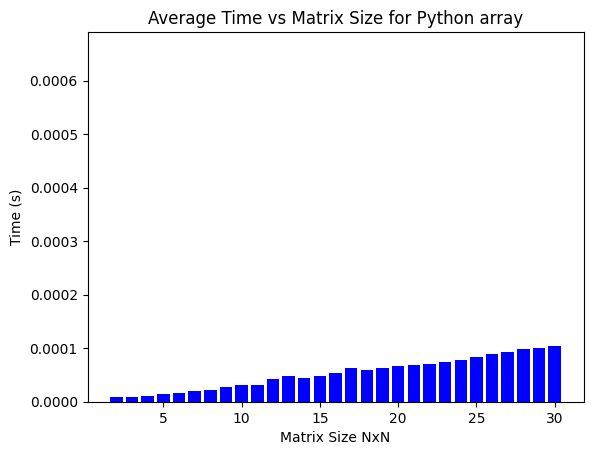

In [32]:
y_values = [timings[size]['pyarr'] for size in sizes]
plot_graph(sizes, y_values, title=title_avgtime_pyarr, ylim=ylim_time)

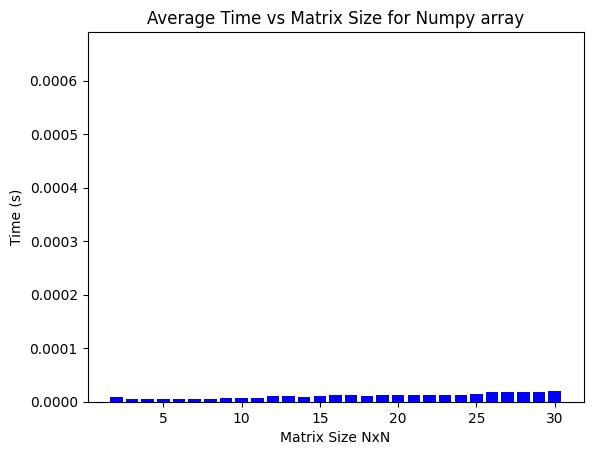

In [33]:

y_values = [timings[size]['nparr'] for size in sizes]
plot_graph(sizes, y_values, title=title_avgtime_nparr, ylim=0.000025)

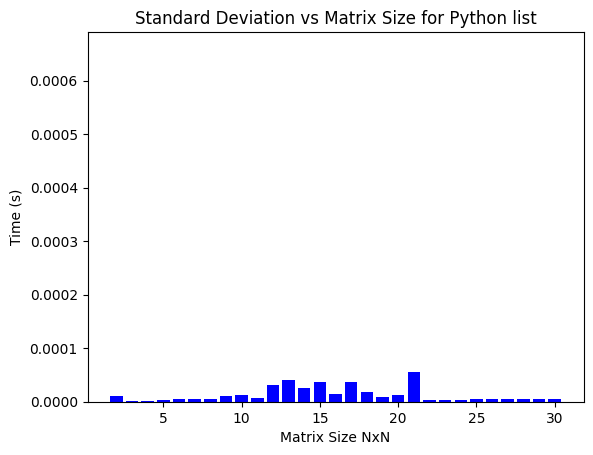

In [34]:
title_std_pyls = 'Standard Deviation vs Matrix Size for Python list'
title_std_pyarr = 'Standard Deviation vs Matrix Size for Python array'
title_std_nparr = 'Standard Deviation vs Matrix Size for Numpy array'

y_values = [stds[size]['pyls'] for size in sizes]
plot_graph(sizes, y_values, title=title_std_pyls, ylim=ylim_time)

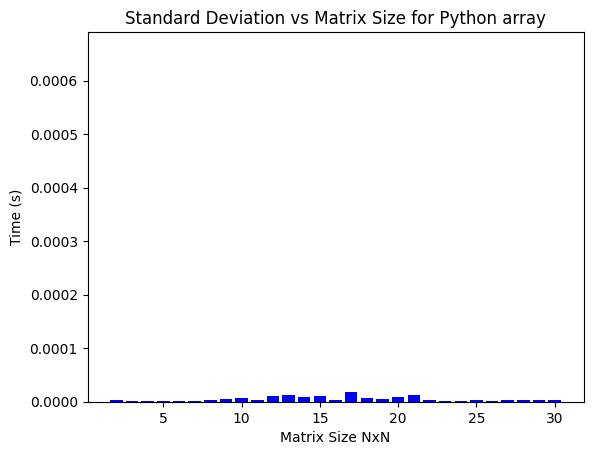

In [35]:

y_values = [stds[size]['pyarr'] for size in sizes]
plot_graph(sizes, y_values, title=title_std_pyarr, ylim=ylim_time)

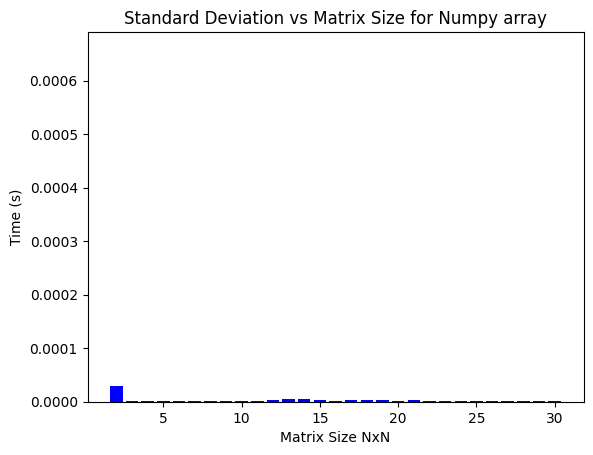

In [36]:

y_values = [stds[size]['nparr'] for size in sizes]
plot_graph(sizes, y_values, title=title_std_nparr, ylim=ylim_time)

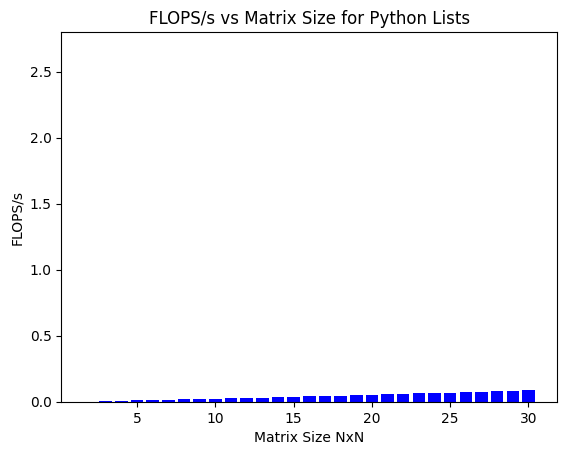

In [37]:
def plot_flops(sizes, times, title, ylim):
    plt.bar(sizes, times, color='blue')

    plt.xlabel('Matrix Size NxN')
    plt.ylabel('FLOPS/s')
    plt.ylim(0,ylim)
    plt.title(title)
    plt.show()

time_list = [timings[size]['pyls'] for size in sizes]
list_flops = [dgemm.calculate_flops_per_second(size, time) for size, time in zip(sizes, time_list)]
plot_flops(sizes, list_flops, title='FLOPS/s vs Matrix Size for Python Lists', ylim=2.8)

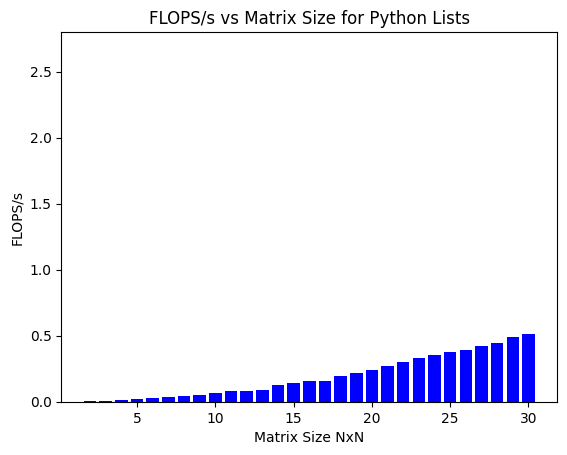

In [38]:
time_list = [timings[size]['pyarr'] for size in sizes]
list_flops = [dgemm.calculate_flops_per_second(size, time) for size, time in zip(sizes, time_list)]
plot_flops(sizes, list_flops, title='FLOPS/s vs Matrix Size for Python Lists', ylim=2.8)

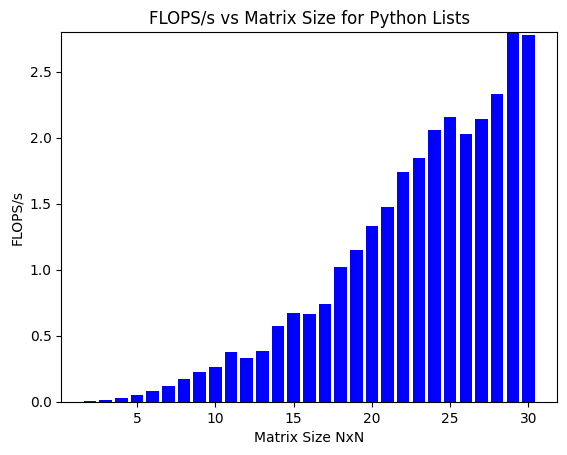

In [39]:
time_list = [timings[size]['nparr'] for size in sizes]
list_flops = [dgemm.calculate_flops_per_second(size, time) for size, time in zip(sizes, time_list)]
plot_flops(sizes, list_flops, title='FLOPS/s vs Matrix Size for Python Lists', ylim=2.8)

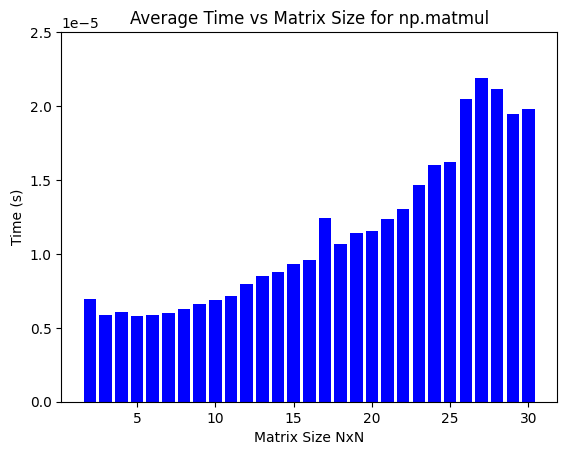

In [64]:
plot_graph(sizes, matmul_times, title='Average Time vs Matrix Size for np.matmul', ylim=0.000025)